In [26]:
import pandas as pd
import numpy as np

train = pd.read_csv("./pre_processed_train.csv",index_col="id")
test = pd.read_csv("./pre_processed_test.csv",index_col="id")

X=train.copy()
X_test=test.copy()


y=X.label
y_test=X_test.label

X=X.drop(['label'],axis=1)
X_test=X_test.drop(['label'],axis=1)

train.head()

,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,lex_liwc_Tone,...,Tokenized_Segment_1601,Tokenized_Segment_1602,Tokenized_Segment_1603,Tokenized_Segment_1604,Tokenized_Segment_1605,Tokenized_Segment_1606,Tokenized_Segment_1607,Tokenized_Segment_1608,Tokenized_Segment_1609,Tokenized_Segment_1610
id,,,,,,,,,,,,,,,,,,,,,
33181,1,0.8,1521614353,5,1.806818,116,72.64,15.04,89.26,1.00,...,0,0,0,0,0,0,0,0,0,0
2606,0,1.0,1527009817,4,9.429737,109,79.08,76.85,56.75,98.18,...,0,0,0,0,0,0,0,0,0,0
38816,1,0.8,1535935605,2,7.769821,167,33.80,76.38,86.24,25.77,...,0,0,0,0,0,0,0,0,0,0
239,1,0.6,1516429555,0,2.667798,273,2.98,15.25,95.42,79.26,...,0,0,0,0,0,0,0,0,0,0
1421,1,0.8,1539809005,24,7.554238,89,32.22,28.71,84.01,1.00,...,0,0,0,0,0,0,0,0,0,0


In [27]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from lightgbm import LGBMClassifier


import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

In [31]:
def get_models():
    
    models = dict()
    models['xgboost'] = XGBClassifier(**{'objective': 'reg:squarederror',
    'tree_method': 'gpu_hist', 'max_depth':2})
    models['GBM'] = GradientBoostingClassifier()
    models['LGBM'] = LGBMClassifier()
    return models

In [32]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=4, random_state=1)
	scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
	return scores


>xgboost 0.78 (0.03)
>GBM 0.78 (0.03)
>LGBM 0.78 (0.02)


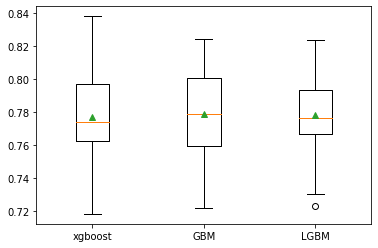

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import mean
from numpy import std

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.2f (%.2f)' % (name, scores.mean(), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()